In [2]:
# Install Excel support and import all required libraries
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime



In [3]:
df = pd.read_excel('online_retail.xlsx')


In [4]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [5]:
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]

In [6]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


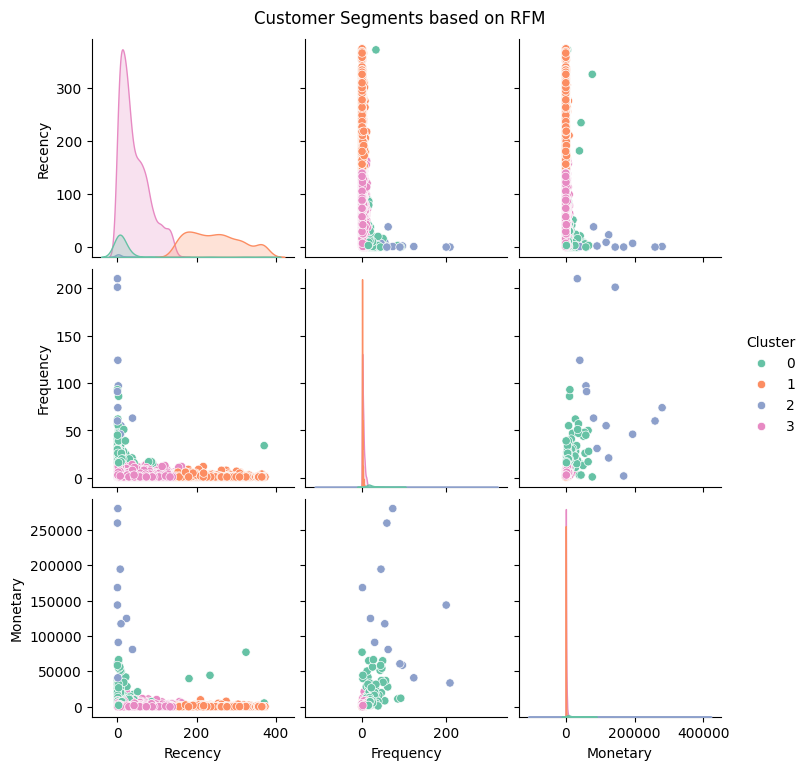

In [8]:
sns.pairplot(rfm, hue='Cluster', palette='Set2')
plt.suptitle('Customer Segments based on RFM', y=1.02)
plt.show()


In [9]:
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,14.672986,22.047393,12453.225924
1,247.564030,1.551789,478.107581
2,6.384615,82.692308,127338.313846
3,42.920380,3.656619,1350.140532


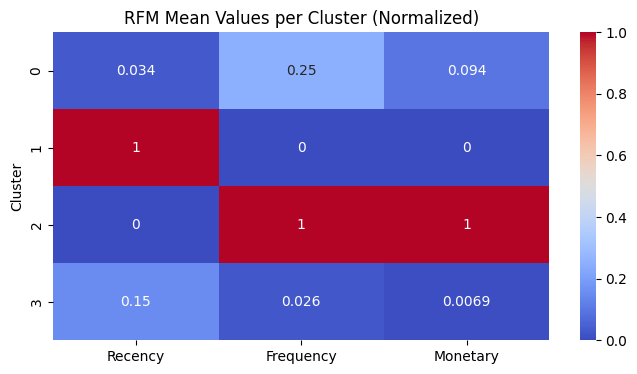

In [10]:
# Convert Cluster column to string for visualization
rfm['Cluster'] = rfm['Cluster'].astype(str)

# Cluster interpretation using heatmap
rfm_grouped = rfm.groupby('Cluster').mean()

# Normalize for heatmap
rfm_norm = (rfm_grouped - rfm_grouped.min()) / (rfm_grouped.max() - rfm_grouped.min())

plt.figure(figsize=(8, 4))
sns.heatmap(rfm_norm, annot=True, cmap='coolwarm')
plt.title('RFM Mean Values per Cluster (Normalized)')
plt.show()


/tmp/ipython-input-3523172685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette='Set2')


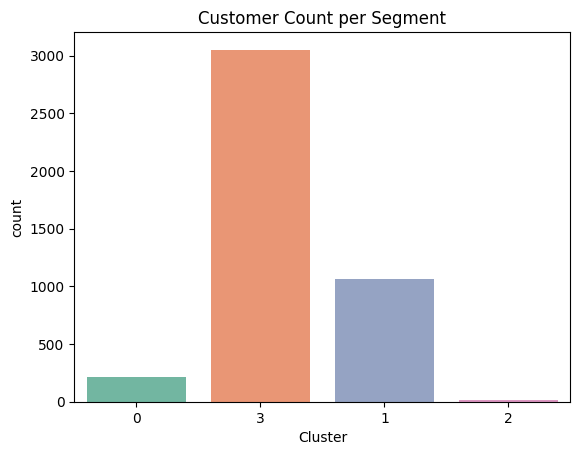

In [11]:
# Count of customers in each cluster
sns.countplot(x='Cluster', data=rfm, palette='Set2')
plt.title('Customer Count per Segment')
plt.show()


In [ ]:
### 🔍 Insights:
- **Cluster 0:** High Frequency, High Monetary – Loyal Customers
- **Cluster 1:** Low Recency, Low Monetary – At-Risk Customers
...

### 💡 Recommendations:
- Reward loyal customers with loyalty programs or discounts
- Re-engage at-risk customers with targeted campaigns
- Focus marketing budget on high-value clusters
